Text(0.5,1,'kernel')

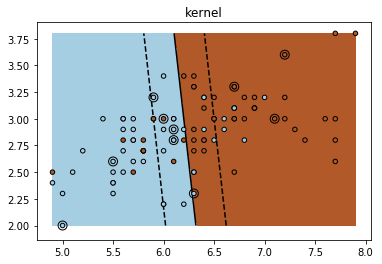

In [9]:
#import some modules and classes

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

# import some data

iris = datasets.load_iris()
X = iris.data
y = iris.target

# take the first two features

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

# shuffle the dataset

order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model

clf = svm.SVC(kernel='linear', gamma=10)
clf.fit(X_train, y_train)

# plot the dataset


plt.figure('linear')
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=20)


plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10, edgecolor='k')
plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()


# circle out the test data
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])


# put the result into a colour plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.title('kernel')

